## 4.7. Ozellik Muhendisligi 1 - Odev

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
axis_font={'family':'arial','color':'darkblue','weight':'bold','size':10}

In [2]:
sinav = pd.read_csv('StudentsPerformance.csv')
sinav.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


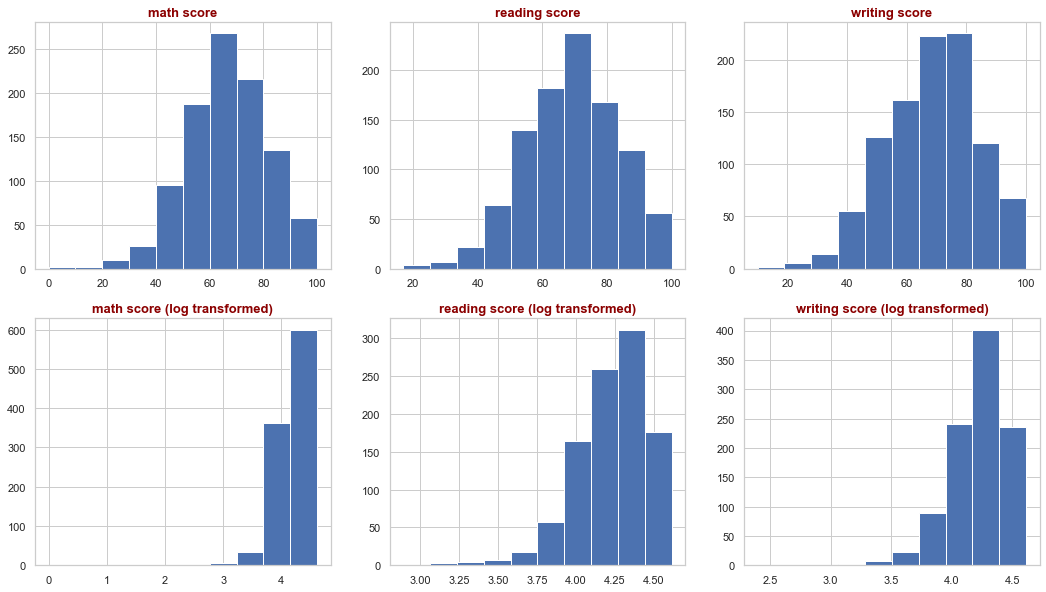

In [3]:
# 1. Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

plt.figure(figsize=(18,10))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['math score','reading score','writing score']

for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.hist(sinav[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.hist(np.log(sinav[variables[i]]+1))     # math score icinde 0 degerler oldugu icin boyle bir yontem sectim
    plt.title(variables[i] + ' (log transformed)', fontdict=title_font)

# orijinal veriler log donusumlulere gore normal dagilima daha yakin duruyor. Asagida log donusumu istatistiksel 
# olarak da test ettigimde p-value her biri isin 0 degeri verdigi icin normal dagilmadigini kanitlamis oluyoruz.

In [4]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

variables = ['math score','reading score','writing score']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(sinav[variable]+1))
    norm_stats = normaltest(np.log(sinav[variable]+1))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,100224.83407,0.00000,964.72494,0.00000
1,reading score,460.62976,0.00000,202.35115,0.00000
2,writing score,1233.93927,0.00000,303.16712,0.00000


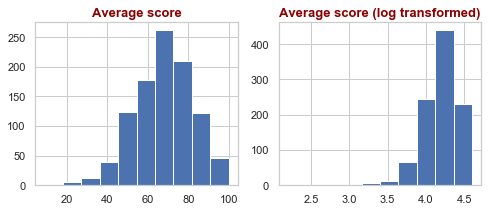

In [5]:
# 2. Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. 
# Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. 
# Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. 
# Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve 
# dönüşümün sonucunu test edin.

sinav['average score']=(sinav['math score']+sinav['reading score']+sinav['writing score'])/3

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(sinav['average score'])
plt.title('Average score', fontdict=title_font)

plt.subplot(1,2,2)
plt.hist(np.log(sinav['average score']))
plt.title('Average score (log transformed)', fontdict=title_font)
plt.show()

# Ortalama degerlerde de her bir sinav sonucu gibi orijinal veri normal dagilima daha yakin.

In [6]:
sinav.dropna(inplace=True)
sinav.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.66667
1,female,group C,some college,standard,completed,69,90,88,82.33333
2,female,group B,master's degree,standard,none,90,95,93,92.66667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33333
4,male,group C,some college,standard,none,76,78,75,76.33333


In [7]:
# 3. Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav 
# başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

sinav = pd.concat([sinav, pd.get_dummies(sinav['gender'], drop_first=True)], axis=1)
sinav = pd.concat([sinav, pd.get_dummies(sinav['race/ethnicity'], drop_first=True)], axis=1)
sinav = pd.concat([sinav, pd.get_dummies(sinav['parental level of education'], drop_first=True)], axis=1)
sinav = pd.concat([sinav, pd.get_dummies(sinav['lunch'], drop_first=True)], axis=1)
sinav = pd.concat([sinav, pd.get_dummies(sinav['test preparation course'], drop_first=True)], axis=1)
sinav.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,male,...,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,female,group B,bachelor's degree,standard,none,72,72,74,72.66667,0,...,0,0,0,1,0,0,0,0,1,1
1,female,group C,some college,standard,completed,69,90,88,82.33333,0,...,1,0,0,0,0,0,1,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,92.66667,0,...,0,0,0,0,0,1,0,0,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33333,1,...,0,0,0,0,0,0,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,76.33333,1,...,1,0,0,0,0,0,1,0,1,1


In [8]:
sinav_corr = sinav.corr()

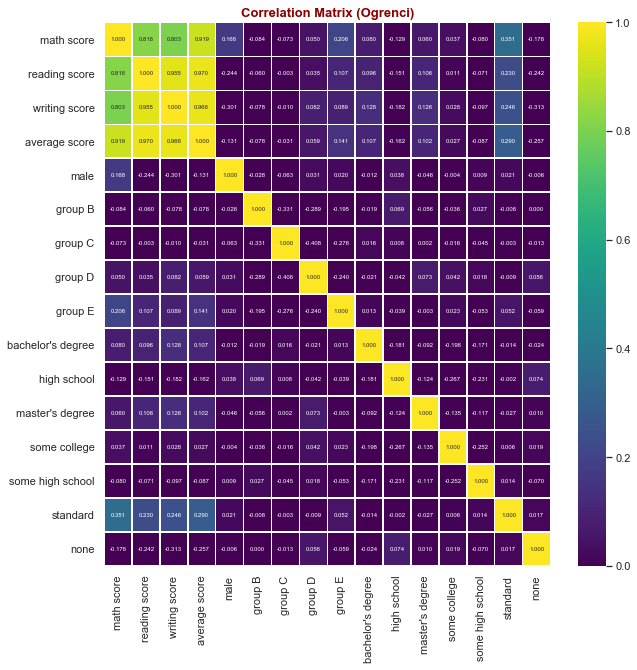

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(sinav_corr, annot=True, fmt='.3f', annot_kws={"size": 6}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Ogrenci)", fontdict=title_font)

plt.show()

# cok kuvvetli bir iliski var gibi gozukmese de gender ve test preparation course degiskenlerini tutardim